In [2]:
# Numerical Operations
import math
import numpy as np

# Reading/Writing Data
import pandas as pd
import os
import csv

# For Progress Bar
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

# For plotting learning curve
#from torch.utils.tensorboard import SummaryWriter

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances


In [3]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [4]:
import os
os.getcwd()

'/Users/linyinghsiao/Documents/GitHub/fraud-detection-E.SUN/preprocessing'

In [5]:
public = pd.read_csv('../datasets/dataset_1st/public_processed.csv') #'../' 用于表示当前目录的上一级目录。
train = pd.read_csv('../datasets/dataset_1st/training.csv')


In [7]:
data = pd.concat([public,train])
df

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,1353.00,0,1,3.0,0,1349,0.0,15759.0,NaN,0,0,6.0,70.0,1349,0,NaN
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,305.00,1,0,0.0,0,306,0.0,13451.0,NaN,0,0,6.0,70.0,306,0,NaN
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,20.00,0,0,0.0,0,20,0.0,15759.0,NaN,0,0,NaN,NaN,0,0,NaN
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,8371.00,1,0,0.0,0,8339,42.0,12381.0,NaN,0,0,6.0,70.0,8339,0,NaN
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,163.69,1,0,0.0,0,163,126.0,14786.0,NaN,0,0,6.0,68.0,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688521,fe5788aae7affa13a3946608670d7cdb9b4cde44f8f2cf...,14,84737,a894ea5eaf2c114231806da124f9d422b2c74653f071ec...,4616fbb5e28fbf86012461fc98652f51af00d2226aa634...,5,4.0,3c31ae50e4d36fe64a518a2c8109d14dd8d6b3a08edc92...,5f9c23caf7da7e1cf1e53ff9eab71dde3cfd72819e5210...,282.0,49.00,0,0,0.0,0,49,0.0,15759.0,NaN,0,0,0.0,70.0,49,0,0.0
8688522,8a2b5b7ba4443c311f06be147e42e7493735ae203c48ba...,23,105923,e3ee9fcf2bbabdfb2a4e6a7dfca046f1597888a8ebc3d2...,29e5be6d2bc0f3e539f13675c3faada5f07afb6f6df40a...,5,4.0,f56737b0e28217d7958e7ef135df60a5a02451c61596ef...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,276.0,4020.00,0,0,0.0,0,4018,0.0,15759.0,NaN,0,0,6.0,70.0,4018,0,0.0
8688523,15a9ef847ce3702a176abfaceedf9a22a328e27a0c99a9...,23,141030,85a538fe0cb00a82ebdb948f1a8b45bfea5005dfcf7dcb...,2990660b8172986c57c793f16bb565ae29cd7572b50f05...,5,4.0,5f5906af767850a3d99fee5fc7ec9025467c4f9d9c8070...,2fea345d14a69774026f3de93f5e3313219363d54e07b1...,272.0,315.00,0,0,0.0,0,314,0.0,11380.0,NaN,0,0,6.0,70.0,314,0,0.0
8688524,2ed4454b4fcce6b9f98c3c22a1df941f03beb14bce94ea...,10,120209,1dd744fc7ca8249f3eb54514530bd9c242d338421ef819...,fca665553fe576b40984abe18261056736b923c3310f1d...,5,5.0,c795cb82dae8d6605d4856d4f2fa58cf1b0e158457fab8...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,272.0,226.00,1,0,0.0,0,225,0.0,15759.0,NaN,0,0,6.0,70.0,225,0,0.0


In [ ]:
del public, train

In [8]:
df = df.fillna(-1)
df.head(10)

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,conam,ecfg,insfg,iterm,bnsfg,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,1353.00,0,1,3.0,0,1349,0.0,15759.0,-1.0,0,0,6.0,70.0,1349,0,-1.0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,305.00,1,0,0.0,0,306,0.0,13451.0,-1.0,0,0,6.0,70.0,306,0,-1.0
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,20.00,0,0,0.0,0,20,0.0,15759.0,-1.0,0,0,-1.0,-1.0,0,0,-1.0
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,8371.00,1,0,0.0,0,8339,42.0,12381.0,-1.0,0,0,6.0,70.0,8339,0,-1.0
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,163.69,1,0,0.0,0,163,126.0,14786.0,-1.0,0,0,6.0,68.0,5,0,-1.0
5,fd64ce519d3850ba9da4ee7fd0832222693193088e89dc...,59,152823,ee088992c8a0188647bd57018e2a0d32c5f572eab9ed5a...,f57fa89a86108807bb4c04dfc42a08d679ffeffe2fbee3...,5,5.0,c2f959592b9f6b1ea8fbe12e9a4a1ac0fd0b2543dd3fe3...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,275.0,10.00,1,0,0.0,0,10,0.0,16115.0,-1.0,0,0,6.0,70.0,10,0,-1.0
6,0c93f45dac9454a159daacfd6bb1f63fabd6c75d92a47e...,59,113224,02bd712ddaae04c874f1d1f1d74069da69b99da1eef7a4...,2cd8983df4f8fac49c6bcb28432638d7bf538fd22ac920...,5,4.0,466f3ec97458ba5e90f0fab6fd7433c1e3ae9150e8229d...,d0c4efb29970311d8492fbfb19616b631f38593cafff95...,282.0,125.00,0,0,0.0,0,125,0.0,15759.0,-1.0,0,0,0.0,70.0,125,0,-1.0
7,f46b16150256c36df77817ccc9a8450e82532457dcb1ad...,56,131739,db35e8dbabf21f1ba960682dc66472ef9c5e3b2dcc26bf...,aa93e894a24e171f2eb9d2e48db31c0b6bc863a62d446a...,5,8.0,c76449edde6889cc61d4403b96b5fbe097b709fee4ee8a...,bcf6370b700fb26d1fab05dad5de442b2bf37689cb55fd...,320.0,55.00,1,0,0.0,0,55,0.0,15759.0,-1.0,0,0,6.0,70.0,55,0,-1.0
8,b62dc04dd4442d27e6a6c87ab82ad98b11f04737d54f97...,56,83744,c42029ff9987b7bce96c132adbcbf38bb05b9d50207f3b...,44265db723e26c1cfd830a1c8d9eb9fef540a806c75491...,5,5.0,e8d98e44151198526e079fdcc7f44c1e16be6f1fc2fb96...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,276.0,222.00,1,0,0.0,0,222,0.0,15759.0,-1.0,0,0,6.0,70.0,222,0,-1.0
9,6f230b30cb79f7b5791348b2a0464cbc92682d94bdd8e9...,56,163138,30aeda17a7ad0a066e4a354460ee0ad0bf5098f6b1d76e...,2242b3ba5e82a24aff6fa4e54b871a4e677e53b0d1c4d2...,5,4.0,f6ed25e91e9858ae7ca6a24943175e6b9569a7ada6bd5e...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,298.0,3090.00,0,0,0.0,0,3100,0.0,15759.0,-1.0,0,0,6.0,70.0,3100,0,-1.0


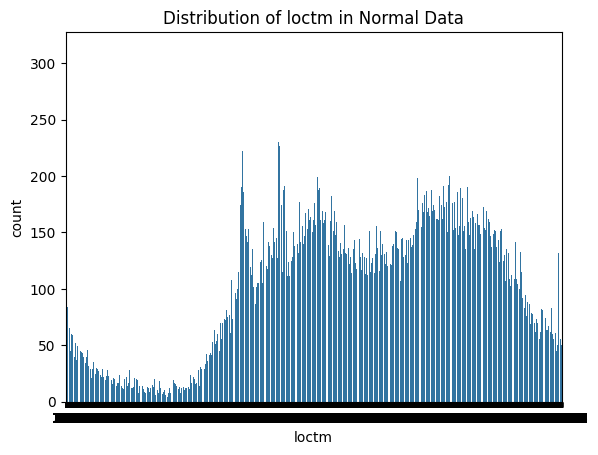

In [14]:
idx = 'loctm'
sns.countplot(x= idx, data=train[train['label']==0])
plt.title(f'Distribution of {idx} in Normal Data')
plt.show()

In [ ]:
idx = 'loctm'
sns.countplot(x= idx, data=train[train['label']==1])
plt.title(f'Distribution of {idx} in Abormal Data')
plt.show()

In [15]:

print((train['label']==0).sum(),(train['label']==1).sum())

8656497 32029


按照比例分資料合併


In [9]:
# 分别设置正常和欺诈样本的数量
n_normal = 30000
n_fraud = 111

# 分别从正常和欺诈样本中抽取
normal_samples = train[train['label'] == 0].sample(n=n_normal, random_state=1)  # 随机种子为了复现结果
fraud_samples = train[train['label'] == 1].sample(n=n_fraud, random_state=1)

# 合并抽取的样本
sampled_data = pd.concat([normal_samples, fraud_samples])

# 查看抽样结果
print(sampled_data)

sampled_data.to_csv('../datasets/dataset_1st/chatgpt_output.csv', index=False)

                                                     txkey  locdt   loctm  \
1460410  ee984d199bd20d4f66179ba258d95a0d23e250dfc1e2b5...     32  163654   
4655606  b4fd40c529fdd5ecb77ede198830726d1b22a307c36b7c...     43  130338   
1109887  889b79652dd0b1b194f1c966ff8fdd31503206852a503b...     13  153337   
967459   d51c0f8a8c78ecf416c594520b34a7b7b791dcb5cb615d...     18  130617   
982336   c044d2900f3ea8164f8d23d019afbaf84ee0ac4d92aafc...     35  125644   
...                                                    ...    ...     ...   
5076350  b1be2b3bb753cf3672f00f4d3035863b86e7e87e8b6385...     18  123629   
3455471  4411bc915ca9c9e908f6ff87ffc23d1d30b6161c857c91...     16  175255   
8116725  354a5bd8916a81d5b78b0b3a757324e60c1ff90594bead...      9  203523   
1655955  b7d1ccd9284b4aa21812de6412fef015637043b58e3a9a...      4  201850   
7217928  b9a34b14893fbe4aadb7aa143cf471efee87503d8b0602...     41  113347   

                                                      chid  \
1460410  07ae

In [ ]:
# Exploratory Data Analysis (EDA)

# Basic information about the dataset
info = data.info()

# Summary statistics for numerical columns
summary_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

info, summary_stats, missing_values
